In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
pd.set_option('display.max_columns', None) #allows me to see all columns in a datafram

In [2]:
wego = pd.read_csv(r'C:\da12\projects\wego-python-da12-python-spice-lattes\data\Headway Data, 8-1-2023 to 9-30-2023.csv')
wego.columns = [x.lower() for x in wego.columns]
wego.head()

,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   calendar_id                350329 non-null  int64  
 1   service_abbr               350329 non-null  int64  
 2   adherence_id               350329 non-null  int64  
 3   date                       350329 non-null  object 
 4   route_abbr                 350329 non-null  int64  
 5   block_abbr                 350329 non-null  int64  
 6   operator                   350329 non-null  int64  
 7   trip_id                    350329 non-null  int64  
 8   overload_id                350329 non-null  int64  
 9   route_direction_name       350329 non-null  object 
 10  time_point_abbr            350329 non-null  object 
 11  route_stop_sequence        350318 non-null  float64
 12  trip_edge                  350329 non-null  int64  
 13  latitude                   35

In [4]:
wego.columns

Index(['calendar_id', 'service_abbr', 'adherence_id', 'date', 'route_abbr',
       'block_abbr', 'operator', 'trip_id', 'overload_id',
       'route_direction_name', 'time_point_abbr', 'route_stop_sequence',
       'trip_edge', 'latitude', 'longitude', 'scheduled_time',
       'actual_arrival_time', 'actual_departure_time', 'adherence',
       'scheduled_hdwy', 'actual_hdwy', 'hdwy_dev', 'adjusted_early_count',
       'adjusted_late_count', 'adjusted_ontime_count', 'stop_cancelled',
       'prev_sched_stop_cancelled', 'is_relief', 'dwell_in_mins',
       'scheduled_layover_minutes'],
      dtype='object')

5. Is there any relationship between lateness (ADHERENCE) and headway deviation?

In [6]:
wego_clean = wego.dropna(subset=['hdwy_dev']).reset_index()
wego_clean.head()
# wego_clean.info()

,index,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes
0,7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
1,8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
2,9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN
3,11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0
4,12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN


In [7]:
columns = ['index','adherence','hdwy_dev']
wego_trim = wego_clean[columns]
wego_trim.head()

,index,adherence,hdwy_dev
0,7,-1.716666,2.666666
1,8,-1.916666,1.966666
2,9,-0.183333,-0.483334
3,11,-1.316666,-2.166667
4,12,1.500000,-3.883334


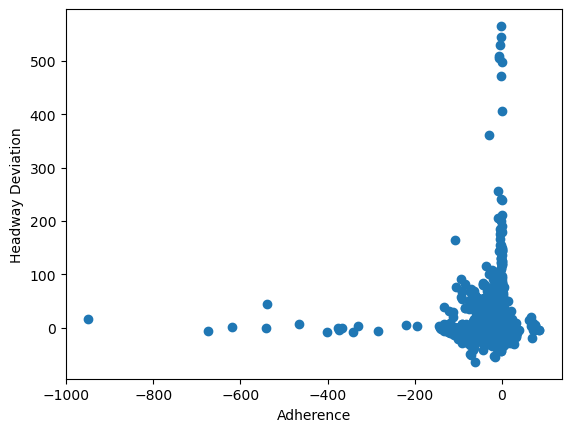

In [8]:
plt.scatter(wego_trim['adherence'],wego_trim['hdwy_dev']) #scatter plot of all adherence and headway dev data
plt.xlabel('Adherence')
plt.ylabel('Headway Deviation')
plt.show()

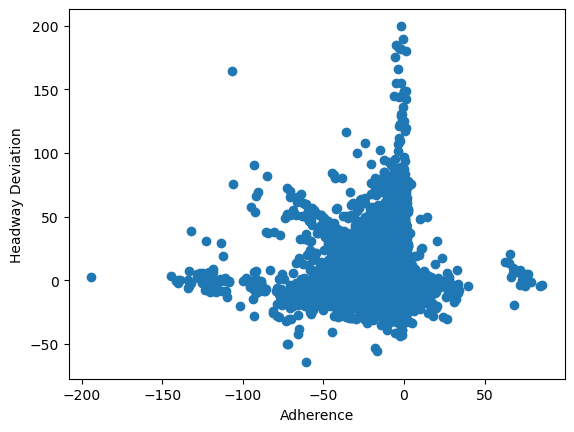

In [9]:
drop_outliers = wego_trim[(wego_trim['adherence'] > -200) & (wego_trim['hdwy_dev'] < 200)]
plt.scatter(drop_outliers['adherence'],drop_outliers['hdwy_dev'])
plt.xlabel('Adherence')
plt.ylabel('Headway Deviation')
plt.show()

In [10]:
wego_trim.corr(method='pearson')

,index,adherence,hdwy_dev
index,1.000000,-0.024963,0.006913
adherence,-0.024963,1.000000,-0.206794
hdwy_dev,0.006913,-0.206794,1.000000


In [11]:
drop_outliers.corr(method='pearson')

,index,adherence,hdwy_dev
index,1.000000,-0.030789,0.007215
adherence,-0.030789,1.000000,-0.270573
hdwy_dev,0.007215,-0.270573,1.000000


Lets look at a few trips with late adherence and see what happens to the headway. Afterwards look at trips with adherence between -6 and 1 and what happens to the headway.

In [13]:
unique_trip_id = wego['trip_id'].unique()
print(unique_trip_id)

[345104 345105 345106 ... 354069 354098 354106]


In [14]:
random_id = random.choice(unique_trip_id)
print(random_id)

345305


In [15]:
routes = wego['route_abbr'].unique()
print(routes)

[22 23  3  7 50 52 55 56]


In [16]:
# Grabbing all data on stop CV23 going to downtown
stop_cv23_todt = (wego
    # .loc[wego['route_abbr'] == 22]
    .loc[wego['route_direction_name'] == 'TO DOWNTOWN']
    # .loc[wego['time_point_abbr'] == 'CV23']
     .dropna(subset=['hdwy_dev'])
    [['date', 'trip_id', 'operator', 'time_point_abbr','route_direction_name', 'trip_edge', 
      'scheduled_time', 'actual_departure_time',
      'scheduled_hdwy', 'actual_hdwy', 'hdwy_dev','adherence'
     ]]
    .sort_values(['date', 'scheduled_time']))
stop_cv23_todt

,date,trip_id,operator,time_point_abbr,route_direction_name,trip_edge,scheduled_time,actual_departure_time,scheduled_hdwy,actual_hdwy,hdwy_dev,adherence
3973,2023-08-01,347538,3124,HHWM,TO DOWNTOWN,1,2023-08-01 04:46:00,2023-08-01 04:46:59,23.0,23.083333,0.083333,-0.983333
3974,2023-08-01,347538,3124,MXBELL,TO DOWNTOWN,0,2023-08-01 04:53:00,2023-08-01 04:54:27,23.0,23.833333,0.833333,-1.450000
2980,2023-08-01,347164,522,HCKP,TO DOWNTOWN,1,2023-08-01 04:55:00,2023-08-01 04:55:19,22.0,20.550000,-1.450000,-0.316666
5083,2023-08-01,347954,1343,GXRVRGAT,TO DOWNTOWN,1,2023-08-01 04:55:00,2023-08-01 04:56:38,25.0,25.350000,0.350000,-1.633333
3975,2023-08-01,347538,3124,MXDONEL,TO DOWNTOWN,0,2023-08-01 05:00:00,2023-08-01 05:03:02,23.0,23.800000,0.800000,-3.033333
...,...,...,...,...,...,...,...,...,...,...,...,...
348084,2023-09-30,351903,1673,28&CHARL,TO DOWNTOWN,0,2023-09-30 23:54:00,2023-09-30 23:54:53,30.0,28.150000,-1.850000,-0.883333
346743,2023-09-30,350452,2990,DKTL,TO DOWNTOWN,0,2023-09-30 23:55:00,2023-10-01 00:00:15,30.0,36.266666,6.266666,-5.250000
349717,2023-09-30,352817,2399,GXFIVEPT,TO DOWNTOWN,0,2023-09-30 23:55:00,2023-09-30 23:54:59,30.0,28.016666,-1.983334,0.016666
347110,2023-09-30,350939,2357,WE23,TO DOWNTOWN,0,2023-09-30 23:56:00,2023-10-01 00:09:31,30.0,41.500000,11.500000,-13.516666


In [17]:
# Grabbing all data on stop CV23 going from downtown
stop_cv23_fromdt = (wego
    # .loc[wego['route_abbr'] == 22]
    .loc[wego['route_direction_name'] == 'FROM DOWNTOWN']
    # .loc[wego['time_point_abbr'] == 'CV23']
     .dropna(subset=['hdwy_dev'])
    [['date', 'trip_id', 'operator', 'time_point_abbr','route_direction_name', 'trip_edge', 
      'scheduled_time', 'actual_departure_time',
      'scheduled_hdwy', 'actual_hdwy', 'hdwy_dev','adherence'
     ]]
    .sort_values(['date', 'scheduled_time']))
stop_cv23_fromdt

,date,trip_id,operator,time_point_abbr,route_direction_name,trip_edge,scheduled_time,actual_departure_time,scheduled_hdwy,actual_hdwy,hdwy_dev,adherence
879,2023-08-01,345573,409,DWMRT,FROM DOWNTOWN,1,2023-08-01 04:45:00,2023-08-01 04:45:17,25.0,24.566666,-0.433334,-0.283333
880,2023-08-01,345573,409,EDBC,FROM DOWNTOWN,0,2023-08-01 04:54:00,2023-08-01 04:55:33,25.0,27.150000,2.150000,-1.550000
491,2023-08-01,345435,1893,DWMRT,FROM DOWNTOWN,1,2023-08-01 05:00:00,2023-08-01 05:03:14,15.0,17.950000,2.950000,-3.233333
492,2023-08-01,345435,1893,EDBC,FROM DOWNTOWN,0,2023-08-01 05:09:00,2023-08-01 05:11:00,15.0,15.450000,0.450000,-2.000000
997,2023-08-01,345646,2088,DWMRT,FROM DOWNTOWN,1,2023-08-01 05:17:00,2023-08-01 05:18:13,17.0,14.983333,-2.016667,-1.216666
...,...,...,...,...,...,...,...,...,...,...,...,...
349315,2023-09-30,352588,1792,MXDONEL,FROM DOWNTOWN,0,2023-10-01 00:47:00,2023-10-02 01:00:41,28.0,43.083333,15.083333,-13.683333
349724,2023-09-30,352818,2399,SAMS,FROM DOWNTOWN,0,2023-10-01 00:47:00,2023-10-02 00:53:33,30.0,32.200000,2.200000,-6.550000
346751,2023-09-30,350453,2990,EDBC,FROM DOWNTOWN,0,2023-10-01 00:48:00,2023-10-02 00:54:56,30.0,39.500000,9.500000,-6.933333
349316,2023-09-30,352588,1792,MXBELL,FROM DOWNTOWN,0,2023-10-01 00:53:00,2023-10-02 01:09:03,26.0,43.866666,17.866666,-16.050000


In [18]:
# plt.scatter(stop_cv23_todt['adherence'],stop_cv23_todt['hdwy_dev'])
# plt.xlabel('Adherence')
# plt.ylabel('Headway Deviation')
# plt.xlim(-40, 10)
# plt.ylim(-20, 20)
# plt.show()

In [19]:
# plt.scatter(stop_cv23_fromdt['adherence'],stop_cv23_fromdt['hdwy_dev'])
# plt.xlabel('Adherence')
# plt.ylabel('Headway Deviation')
# plt.xlim(-40, 10)
# plt.ylim(-20, 20)
# plt.show()

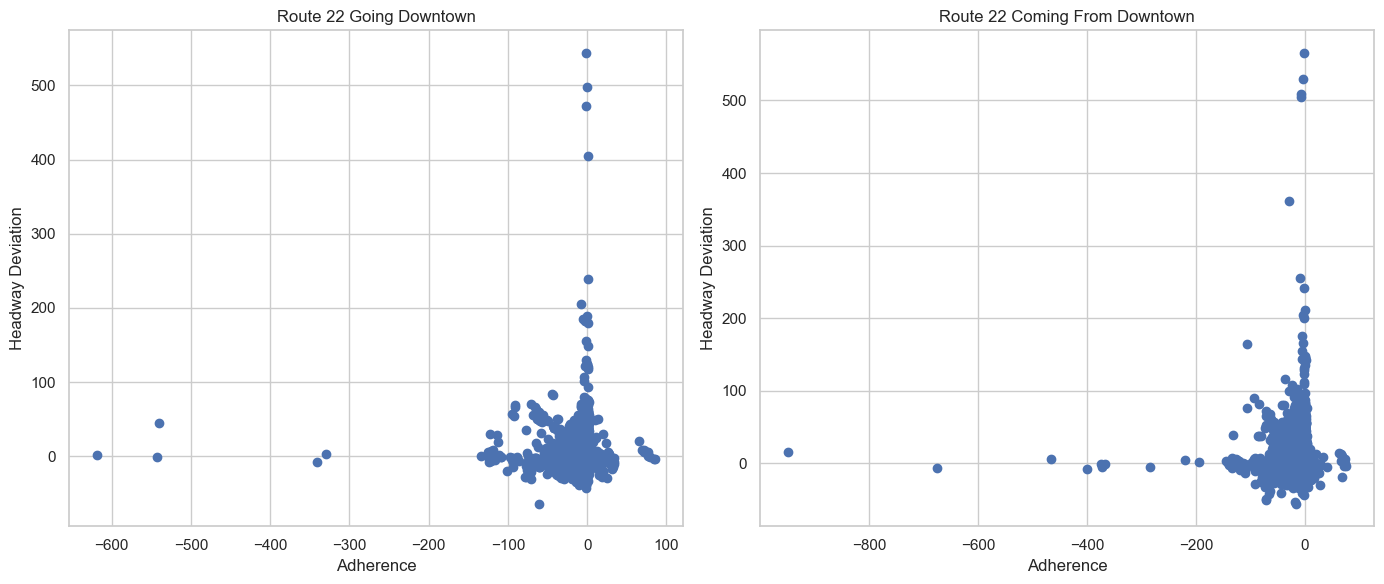

In [20]:
sns.set(style="whitegrid")

# Create a figure with two subplots: one for adherence, one for headway deviation
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot route 22 going to downtown. Ignore data name, stop_cv23 refers to route 22 dataframe
ax1.scatter(stop_cv23_todt['adherence'],stop_cv23_todt['hdwy_dev'])
ax1.set_xlabel('Adherence')
ax1.set_ylabel('Headway Deviation')
ax1.set_title('Route 22 Going Downtown')

# ax1.set_xlim(-40, 10)
# ax1.set_ylim(-20, 20)

# Plot route 22 going from downtown
ax2.scatter(stop_cv23_fromdt['adherence'],stop_cv23_fromdt['hdwy_dev'])
ax2.set_xlabel('Adherence')
ax2.set_ylabel('Headway Deviation')
ax2.set_title('Route 22 Coming From Downtown')

# Set the x-axis limits to -10 and 10
# ax2.set_xlim(-40, 10)
# ax2.set_ylim(-20, 20)

# Show the plots
# plt.legend()
plt.tight_layout()
plt.show()

In [21]:
route23_todt = (wego
    .loc[wego['route_abbr'] == 22]
    .loc[wego['route_direction_name'] == 'TO DOWNTOWN']
    # .loc[wego['time_point_abbr'] == 'CV23']
     .dropna(subset=['hdwy_dev'])
    [['date', 'trip_id', 'operator', 'time_point_abbr','route_direction_name', 'trip_edge', 
      'scheduled_time', 'actual_departure_time',
      'scheduled_hdwy', 'actual_hdwy', 'hdwy_dev','adherence'
     ]]
    .sort_values(['date', 'scheduled_time']))

route23_fromdt = (wego
    .loc[wego['route_abbr'] == 22]
    .loc[wego['route_direction_name'] == 'FROM DOWNTOWN']
    # .loc[wego['time_point_abbr'] == 'CV23']
     .dropna(subset=['hdwy_dev'])
    [['date', 'trip_id', 'operator', 'time_point_abbr','route_direction_name', 'trip_edge', 
      'scheduled_time', 'actual_departure_time',
      'scheduled_hdwy', 'actual_hdwy', 'hdwy_dev','adherence'
     ]]
    .sort_values(['date', 'scheduled_time']))

Use a ridgeline graph to show adherence distribution for each route and headway deviation for each route

In [23]:
wego_clean = wego.dropna(subset=['hdwy_dev']).reset_index()
wego_clean = wego_clean[wego_clean['adherence'].between(-25, 10)]
wego_clean = wego_clean[wego_clean['hdwy_dev'].between(-20,40)]
wego_clean.head()

,index,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes
0,7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
1,8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
2,9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN
3,11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0
4,12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN


In [24]:
adherence_mean_serie = wego_clean.groupby('route_abbr')['adherence'].mean()
wego_clean['mean_adherence'] = wego_clean['route_abbr'].map(adherence_mean_serie)
wego_clean.head()

,index,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes,mean_adherence
0,7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,-2.01569
1,8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,-2.01569
2,9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-2.01569
3,11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,-2.01569
4,12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,-2.01569


In [25]:
abbr_route = {1: 'Route 3',
             2: 'Route 7',
             3: 'Route 22',
             4: 'Route 23',
             5: 'Route 50',
             6: 'Route 52',
             7: 'Route 55',
             8: 'Route 56'}
             

https://python-graph-gallery.com/ridgeline/

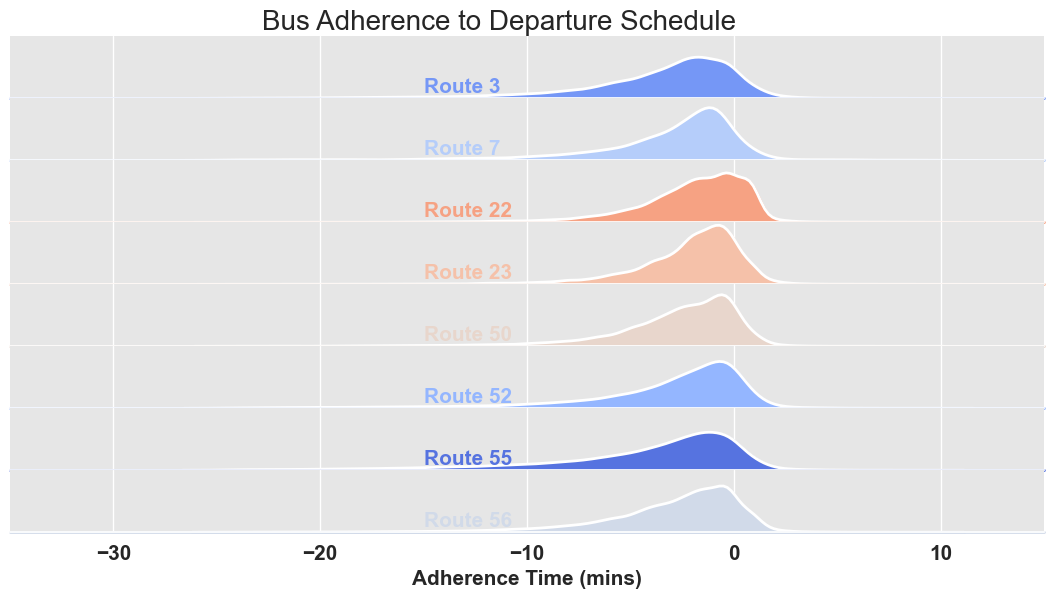

In [27]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=10)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(wego_clean, row='route_abbr', hue='mean_adherence', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'adherence',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'adherence', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.set_xlim(-35, 15)
    ax.text(-15, 0.02, abbr_route[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=0.0)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=False, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Adherence Time (mins)', fontweight='bold', fontsize=15)
g.fig.suptitle('Bus Adherence to Departure Schedule',
               ha='center',
               fontsize=20,
               fontweight=20)

# plt.figure(figsize=(10, 10))
plt.show()

# g.savefig("ridgeline.png")

In [28]:
headway_mean_serie = wego_clean.groupby('route_abbr')['hdwy_dev'].mean()
wego_clean['mean_hdwy_dev'] = wego_clean['route_abbr'].map(headway_mean_serie)
wego_clean.head()

,index,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes,mean_adherence,mean_hdwy_dev
0,7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,-2.01569,0.395173
1,8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,-2.01569,0.395173
2,9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-2.01569,0.395173
3,11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,-2.01569,0.395173
4,12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,-2.01569,0.395173


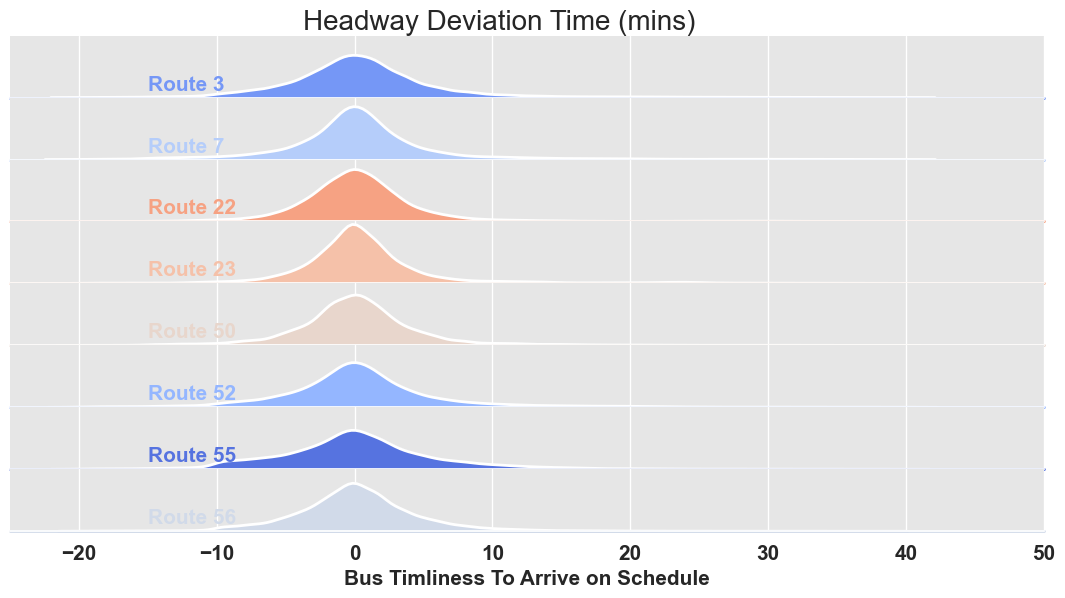

In [29]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=10)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(wego_clean, row='route_abbr', hue='mean_adherence', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'hdwy_dev',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'hdwy_dev', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.set_xlim(-25, 50)
    ax.text(-15, 0.02, abbr_route[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=0.0)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=False, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Bus Timliness To Arrive on Schedule', fontweight='bold', fontsize=15)
g.fig.suptitle('Headway Deviation Time (mins)',
               ha='center',
               fontsize=20,
               fontweight=20)

# plt.figure(figsize=(10, 10))
plt.show()

# g.savefig("ridgeline.png")

In [30]:
from_downtown = (wego
    # .loc[wego['route_abbr'] == 22]
    .loc[wego['route_direction_name'] == 'FROM DOWNTOWN']
    # .loc[wego['time_point_abbr'] == 'CV23']
     .dropna(subset=['hdwy_dev'])
    [['route_direction_name', 'hdwy_dev','adherence'
     ]])
from_downtown.corr(numeric_only=True)

,hdwy_dev,adherence
hdwy_dev,1.000000,-0.204969
adherence,-0.204969,1.000000


In [31]:
to_downtown = (wego
    # .loc[wego['route_abbr'] == 22]
    .loc[wego['route_direction_name'] == 'TO DOWNTOWN']
    # .loc[wego['time_point_abbr'] == 'CV23']
     .dropna(subset=['hdwy_dev'])
    [['route_direction_name', 'hdwy_dev','adherence'
     ]])
to_downtown.corr(numeric_only=True)

,hdwy_dev,adherence
hdwy_dev,1.000000,-0.210859
adherence,-0.210859,1.000000


6. How much impact does being late or too spaced out at the first stop have downstream?  

In [67]:
wego_clean.head()

,index,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes,mean_adherence,mean_hdwy_dev
0,7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,-2.01569,0.395173
1,8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,-2.01569,0.395173
2,9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-2.01569,0.395173
3,11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,-2.01569,0.395173
4,12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,-2.01569,0.395173


In [123]:
trip_start = wego_clean[wego_clean['trip_edge'] == 1]
trip_start.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63487 entries, 0 to 265891
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      63487 non-null  int64  
 1   calendar_id                63487 non-null  int64  
 2   service_abbr               63487 non-null  int64  
 3   adherence_id               63487 non-null  int64  
 4   date                       63487 non-null  object 
 5   route_abbr                 63487 non-null  int64  
 6   block_abbr                 63487 non-null  int64  
 7   operator                   63487 non-null  int64  
 8   trip_id                    63487 non-null  int64  
 9   overload_id                63487 non-null  int64  
 10  route_direction_name       63487 non-null  object 
 11  time_point_abbr            63487 non-null  object 
 12  route_stop_sequence        63483 non-null  float64
 13  trip_edge                  63487 non-null  int64  

In [121]:
trip_mid = wego_clean[wego_clean['trip_edge'] == 0]
# trip_mid.head()
avg_trip_mid = trip_mid.groupby(['trip_id','calendar_id']).mean('hdwy_dev').reset_index()
avg_trip_mid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64082 entries, 0 to 64081
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trip_id                    64082 non-null  int64  
 1   calendar_id                64082 non-null  int64  
 2   index                      64082 non-null  float64
 3   service_abbr               64082 non-null  float64
 4   adherence_id               64082 non-null  float64
 5   route_abbr                 64082 non-null  float64
 6   block_abbr                 64082 non-null  float64
 7   operator                   64082 non-null  float64
 8   overload_id                64082 non-null  float64
 9   route_stop_sequence        64082 non-null  float64
 10  trip_edge                  64082 non-null  float64
 11  latitude                   64082 non-null  float64
 12  longitude                  64082 non-null  float64
 13  adherence                  64082 non-null  flo

In [145]:
trip_merge = pd.merge(trip_start,avg_trip_mid,how='left',on=['trip_id','calendar_id'])
#trip_merge = pd.merge(trip_start,trip_mid,how='right',on=['calendar_id'])
trip_merge.rename(columns={'hdwy_dev_x':'trip_start_hdwy' , 'hdwy_dev_y':'trip_avg_hdwy'},inplace=True)
trip_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63487 entries, 0 to 63486
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index_x                      63487 non-null  int64  
 1   calendar_id                  63487 non-null  int64  
 2   service_abbr_x               63487 non-null  int64  
 3   adherence_id_x               63487 non-null  int64  
 4   date                         63487 non-null  object 
 5   route_abbr_x                 63487 non-null  int64  
 6   block_abbr_x                 63487 non-null  int64  
 7   operator_x                   63487 non-null  int64  
 8   trip_id                      63487 non-null  int64  
 9   overload_id_x                63487 non-null  int64  
 10  route_direction_name         63487 non-null  object 
 11  time_point_abbr              63487 non-null  object 
 12  route_stop_sequence_x        63483 non-null  float64
 13  trip_edge_x     

In [149]:
q6_columns = ['calendar_id', 'trip_id', 'trip_start_hdwy', 'trip_avg_hdwy']
clean_trip_merge = trip_merge[['calendar_id', 'trip_id', 'trip_start_hdwy', 'trip_avg_hdwy']]
clean_trip_merge.head()

,calendar_id,trip_id,trip_start_hdwy,trip_avg_hdwy
0,120230801,345106,2.666666,0.741666
1,120230801,345107,-2.166667,-3.883334
2,120230801,345108,-0.200000,1.400000
3,120230801,345109,0.233333,-0.383334
4,120230801,345110,-0.266667,1.000000


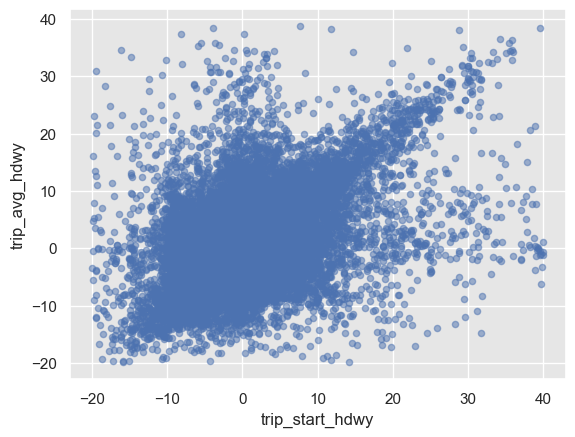

In [155]:
clean_trip_merge.plot.scatter(x='trip_start_hdwy', y='trip_avg_hdwy',alpha=0.5)
plt.show()

In [159]:
# clean_trip_merge.corr()
correlation_coefficient = clean_trip_merge['trip_start_hdwy'].corr(clean_trip_merge['trip_avg_hdwy'])
print(correlation_coefficient)

0.4705379053643217
